In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
train = pd.read_csv("airline_dataset/train.csv")
X_train = train.drop('target',axis=1)
X_train.drop('id',axis =1 , inplace = True)
y_train = train['target']

In [125]:
# Dataset 확인

train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [126]:
# 결측치 (없음) , 데이터 타입 확인 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [127]:
#numeric data
numeric = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

#Category data
category = []
for column in X_train.columns:
    if  column not in numeric:
        category.append(column)

print(numeric)
print(category)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


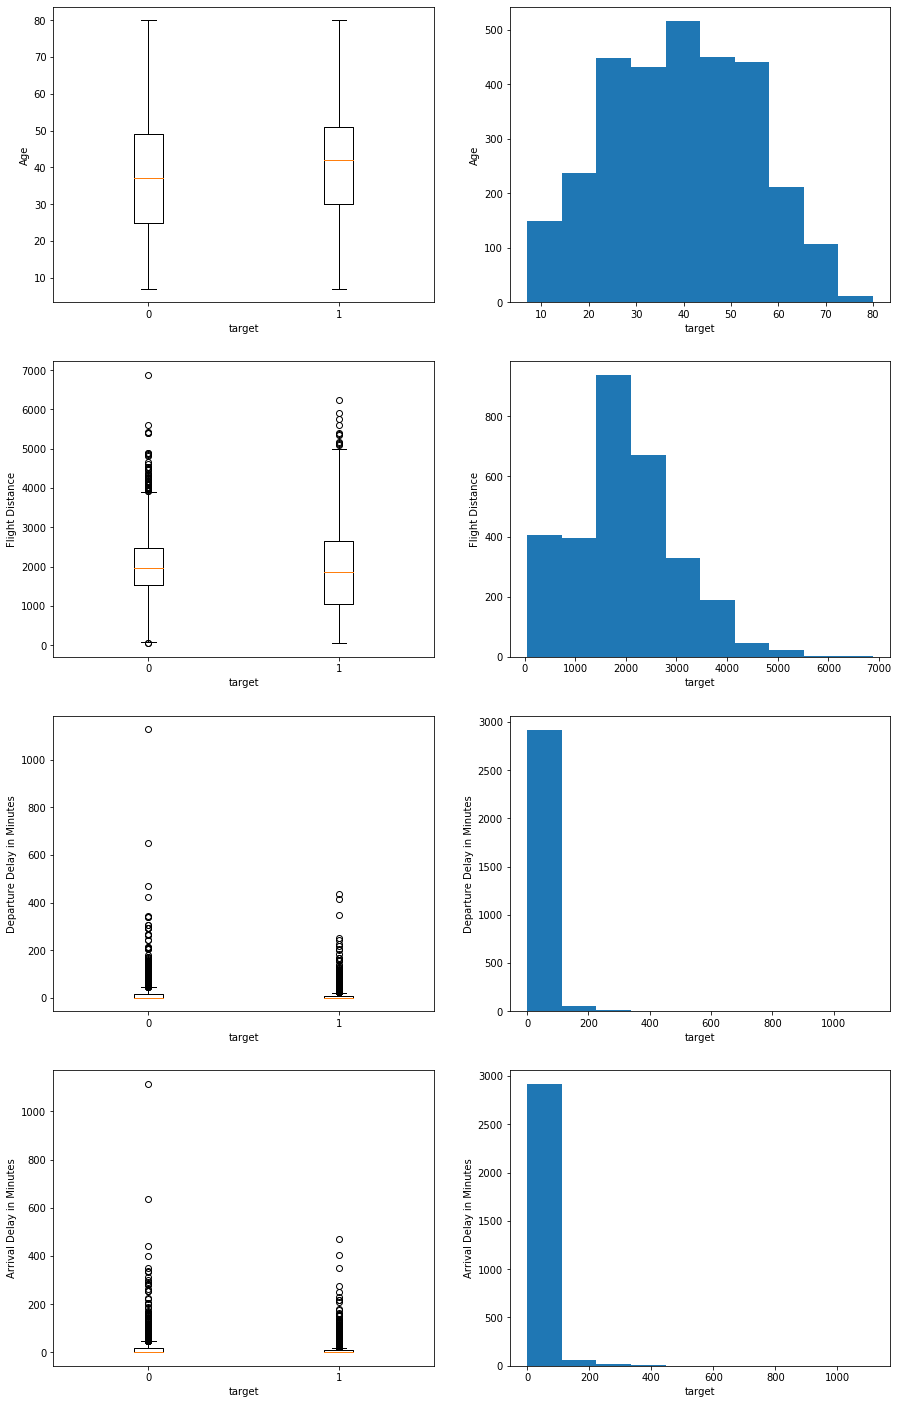

In [128]:
# numeric data visualize ( box plot, hist)

numeric.append('target')
numeric_0 = train[train['target'] == 0][numeric]
numeric_1 = train[train['target'] == 1][numeric]
numeric.pop()

size = len(numeric)
plt.figure(figsize=(15,25)) 
for i,column in enumerate(numeric):
    plt.subplot(size,2,i*2+1)
    plt.boxplot([numeric_0[column],numeric_1[column]])
    plt.xlabel('target')
    plt.ylabel(column)
    plt.xticks([1,2], [0,1])
    
    plt.subplot(size,2,i*2+2)
    plt.hist(train[column])
    plt.xlabel('target')
    plt.ylabel(column)

plt.show()

# Age를 제외하고 왼족으로 데이터 들이 쏠려있음
# Age의 박스플롯은 보면 target에 큰 영향을 미치지 못할 것으로 보임

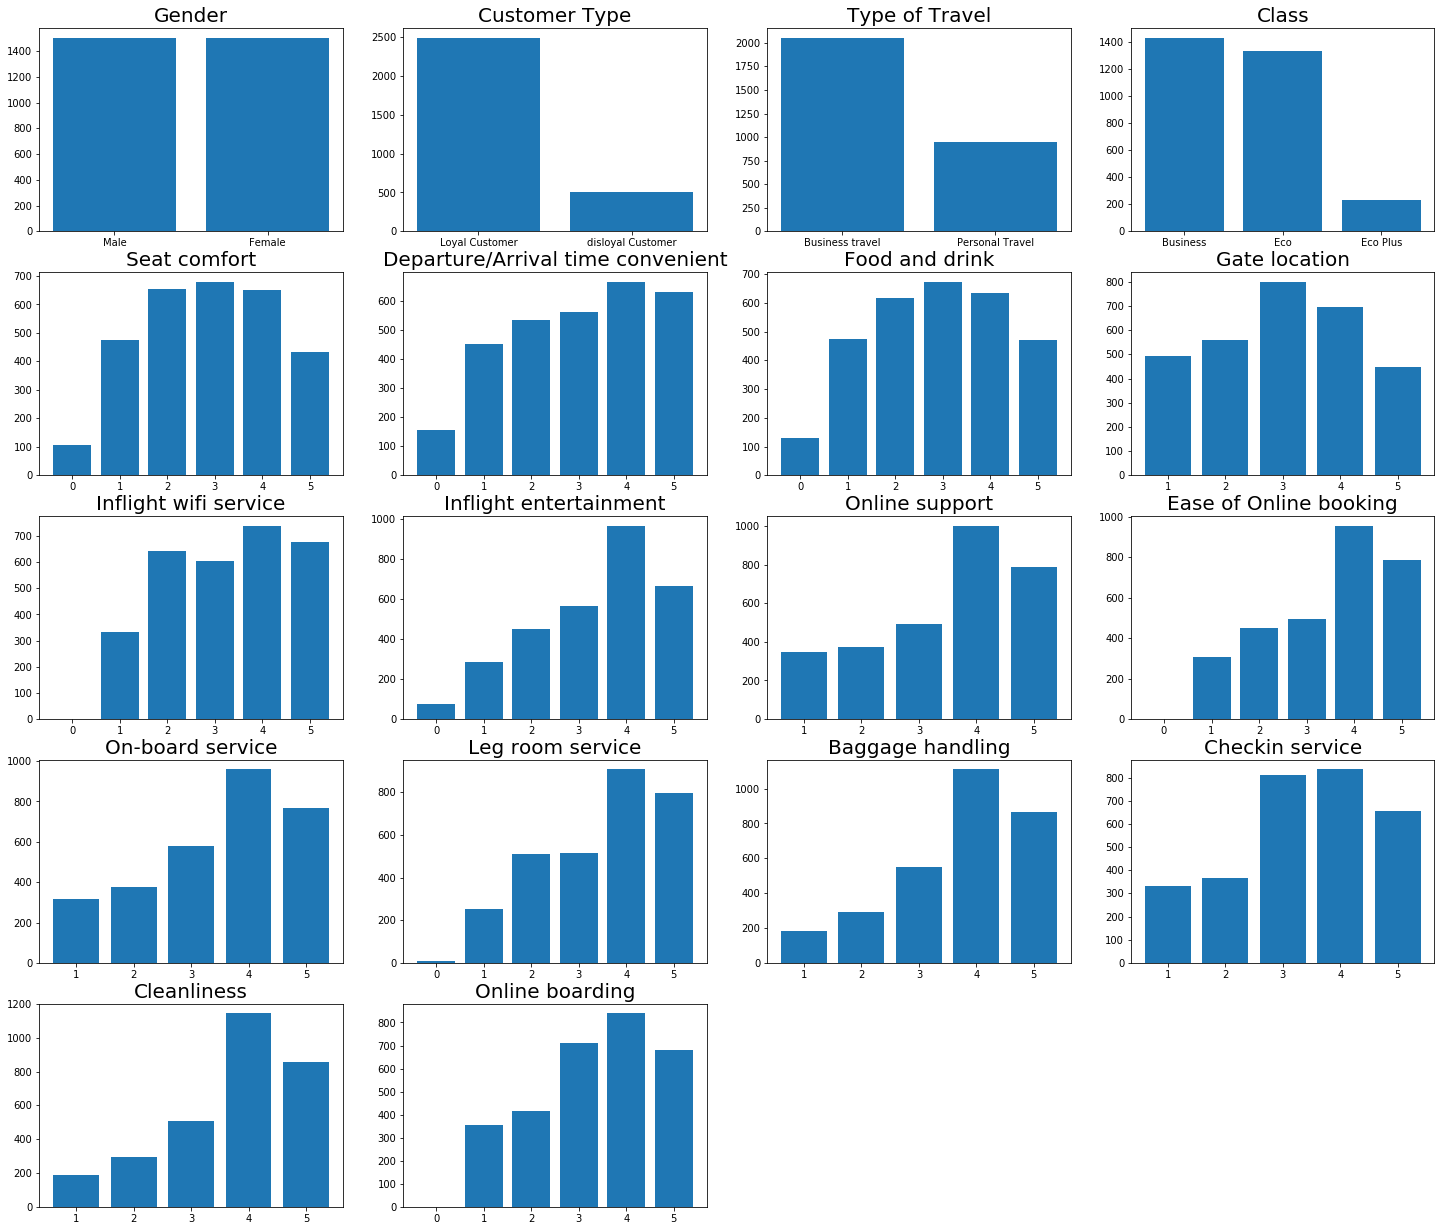

In [169]:
# category data visualize (bar)

size = len(category)
plt.figure(figsize=(25,80))
for i,column in enumerate(category):
    temp = train[column].value_counts()
    plt.subplot(size,4,i+1)
    plt.title(column, fontsize=20)
    plt.bar(temp.keys(), temp.values)
    plt.xticks(temp.keys())
plt.show()

# 상당수의 category 분포가 균일하지 못함

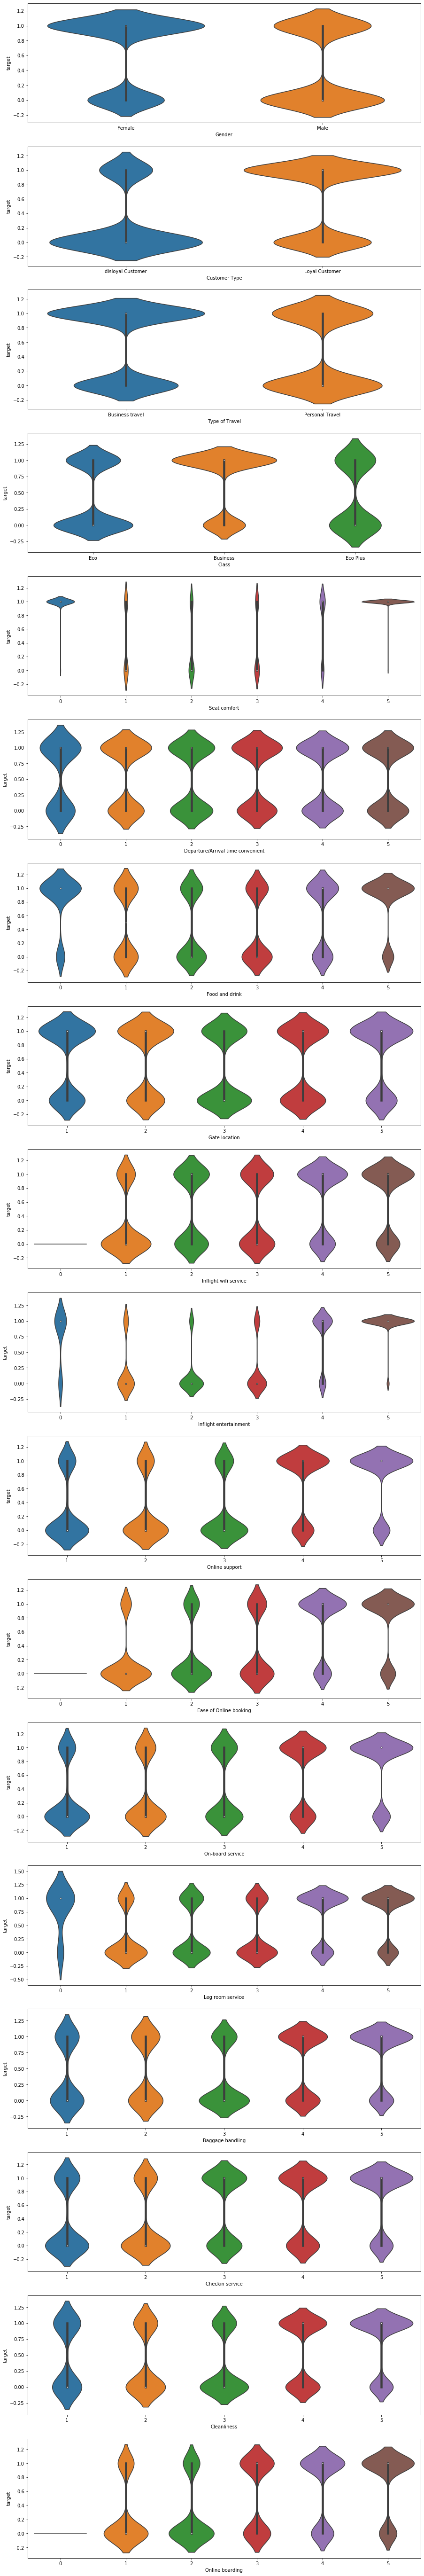

In [213]:
# category data visualize (violinplot)

category.append('target')
category_0 = train[train['target'] == 0][category]
category_1 = train[train['target'] == 1][category]
category.pop()

size = len(category)
plt.figure(figsize=(15,100))
for i,column in enumerate(category):
    plt.subplot(size,1,i+1)
    sns.violinplot(x= train[column], y= train['target'])
    
plt.show()

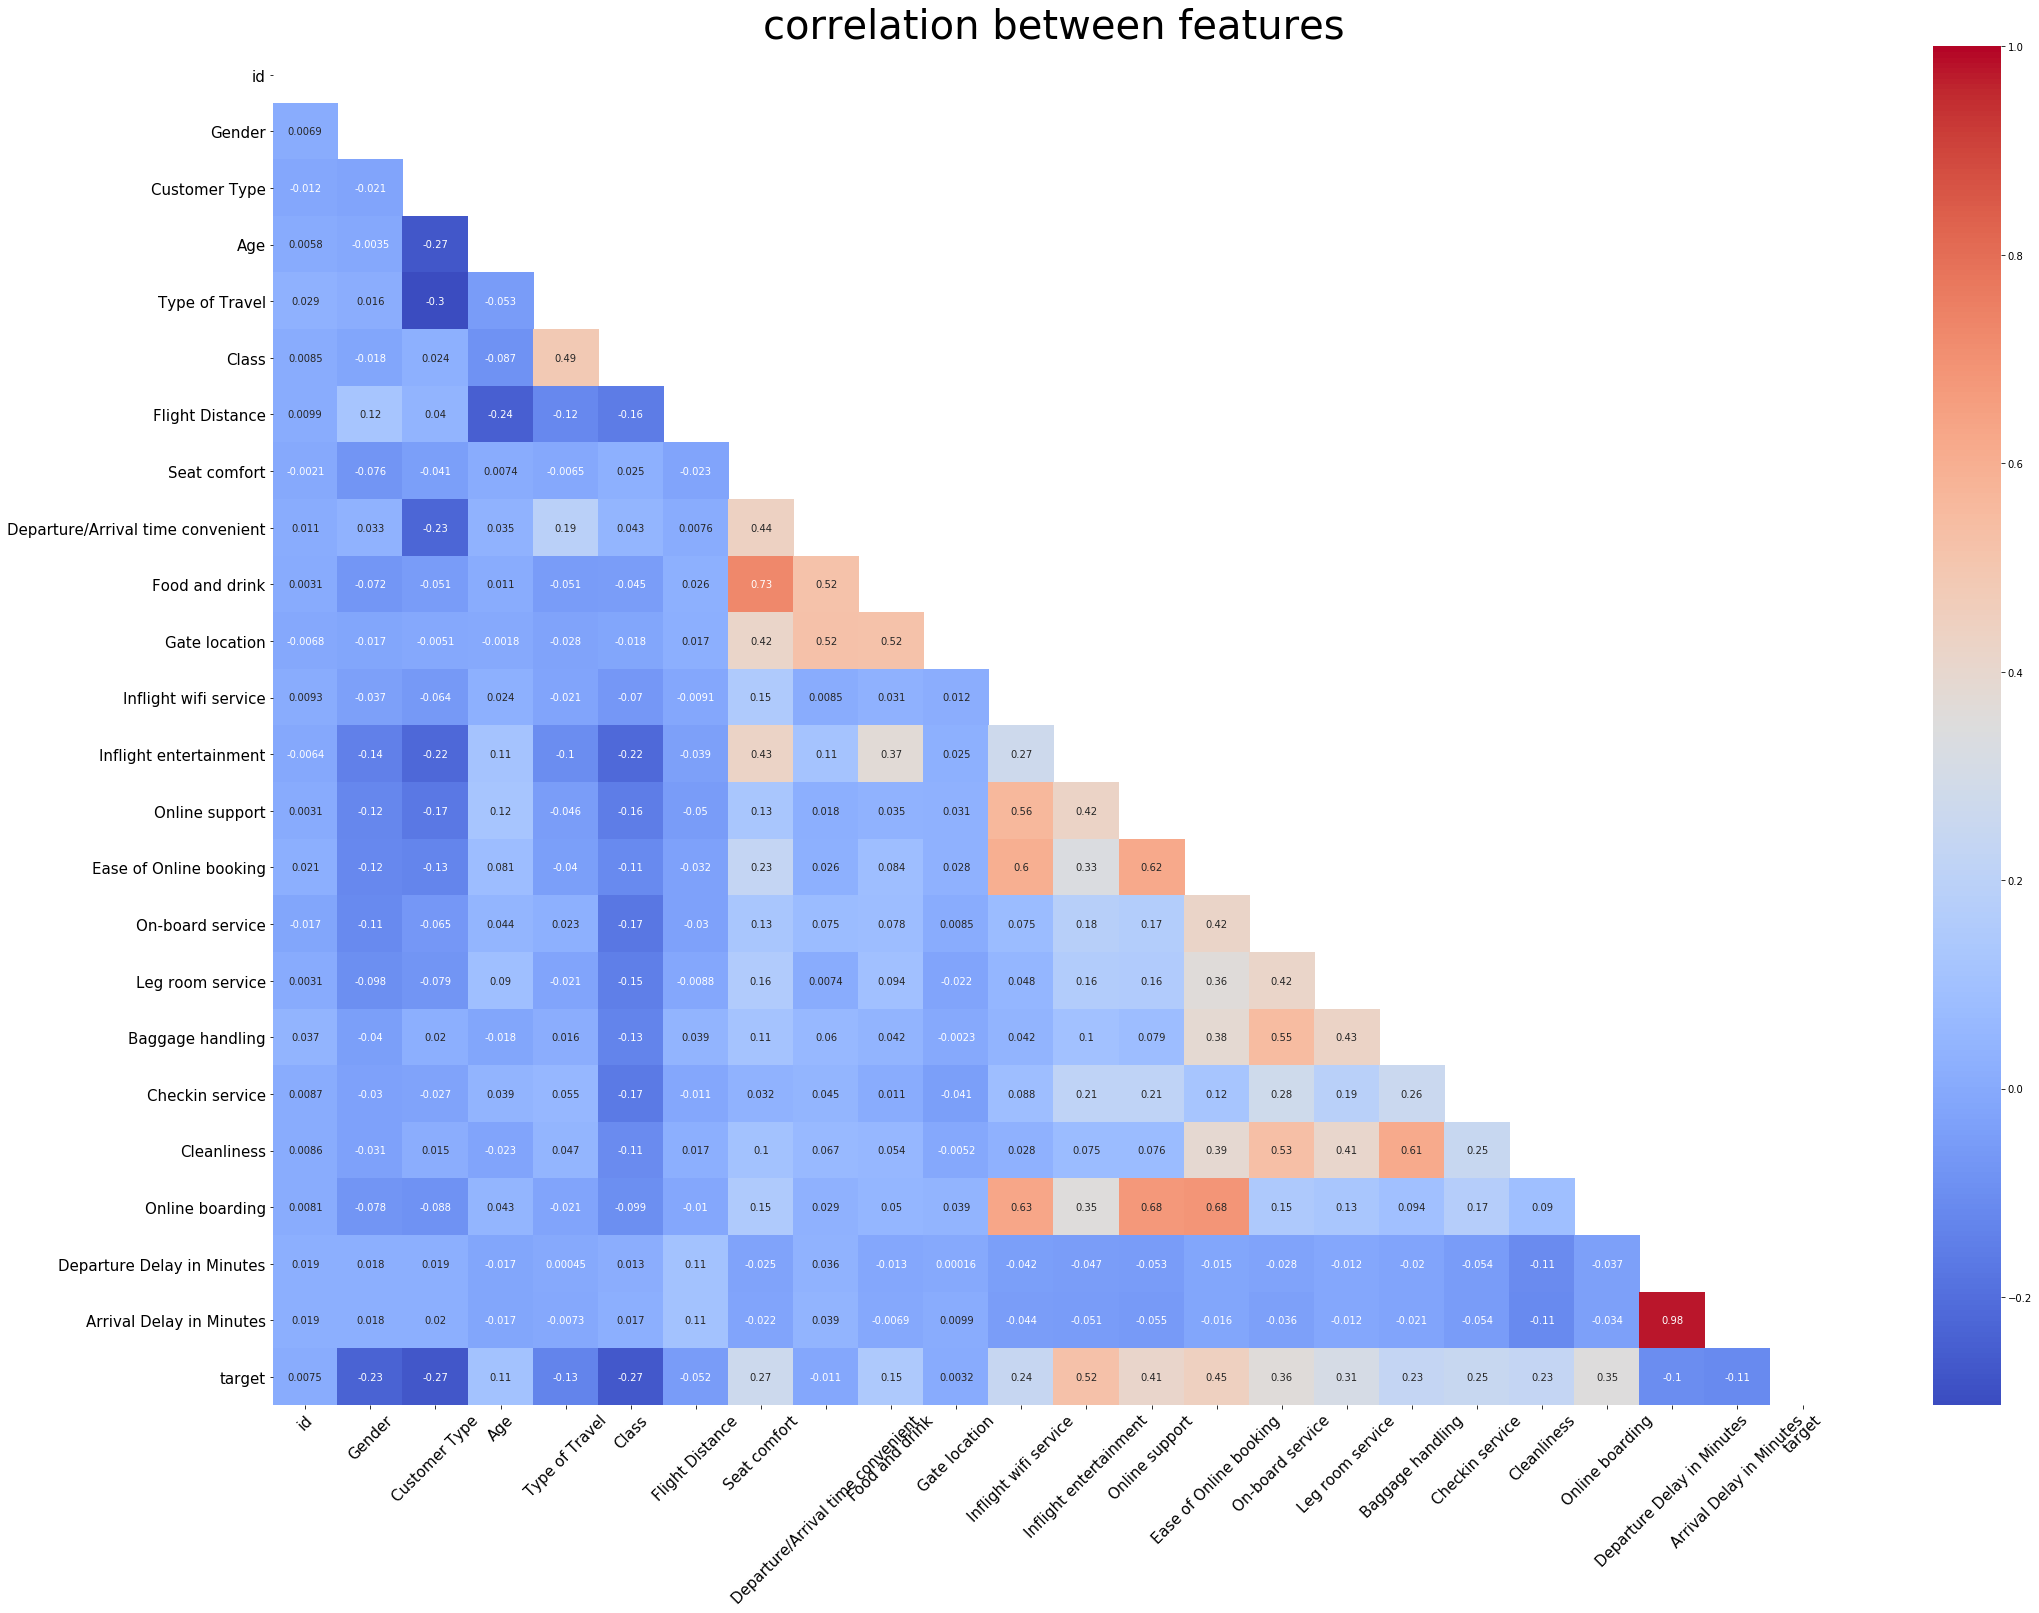

In [215]:
#heatmap

from sklearn.preprocessing import LabelEncoder

# 상관관계 분석을 위해 string 타입의 category를 Label incoding
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

# 상관관계 분석
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()


In [217]:
# infligt entertainment가 0.52로 가장 상관관계가 높게 나타남
# Gate location은 0.0032로 상관관계가 가장 낮음
# Arrival delay와 Depature delay의 상관관계가 매우 높음